In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 1.0
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_10_51_300_1.0_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_10_51_300_1.0_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	104.0822

Best Fitness:	101.1616
Solution:	100.0000
Diff:		1.1616

[0:06:15][----------] 1.96% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	107.7164

Best Fitness:	102.0376
Solution:	100.0000
Diff:		2.0376

[0:12:17][----------] 3.92% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	107.2949

Best Fitness:	101.7141
Solution:	100.0000
Diff:		1.7141

[0:18:20][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	111.1121

Best Fitness:	102.7336
Solution:	100.0000
Diff:		2.7336

[0:24:21][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	115.4078

Best Fitness:	103.0982
Solution:	100.0000
Diff:		3.0982

[0:30:03][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	108.8693

Best Fitness:	102.1423
Solution:	100.0000
Diff:		2.1423

[0:35:21][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	104.3228

Best Fitness:	101.2202
Solution:	100.0000
Diff:		1.2202

[0:40:42][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	107.7531

Best Fitness:	102.1879
Solution:	100.0000
Diff:		2.1879

[0:46:00][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	109.0667

Best Fitness:	101.8216
Solution:	100.0000
Diff:		1.8216

[0:51:24][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	111.3201

Best Fitness:	102.8055
Solution:	100.0000
Diff:		2.8055

[0:56:46][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	109.8966

Best Fitness:	102.5766
Solution:	100.0000
Diff:		2.5766

[1:01:29][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	104.0625

Best Fitness:	101.1344
Solution:	100.0000
Diff:		1.1344

[1:06:12][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	107.4432

Best Fitness:	102.7183
Solution:	100.0000
Diff:		2.7183

[1:10:57][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	107.5302

Best Fitness:	101.3216
Solution:	100.0000
Diff:		1.3216

[1:15:37][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	106.9253

Best Fitness:	101.5852
Solution:	100.0000
Diff:		1.5852

[1:20:16][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	104.7644

Best Fitness:	100.8878
Solution:	100.0000
Diff:		0.8878

[1:24:35][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	103.8593

Best Fitness:	100.9354
Solution:	100.0000
Diff:		0.9354

[1:28:50][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	101.6249

Best Fitness:	100.4161
Solution:	100.0000
Diff:		0.4161

[1:32:58][####------] 35.29% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	107.4118

Best Fitness:	102.2828
Solution:	100.0000
Diff:		2.2828

[1:37:08][####------] 37.25% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	112.4313

Best Fitness:	102.8960
Solution:	100.0000
Diff:		2.8960

[1:41:20][####------] 39.22% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	114.8359

Best Fitness:	103.0739
Solution:	100.0000
Diff:		3.0739

[1:45:13][####------] 41.18% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	108.8222

Best Fitness:	101.7940
Solution:	100.0000
Diff:		1.7940

[1:48:52][####------] 43.14% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	102.4227

Best Fitness:	100.7225
Solution:	100.0000
Diff:		0.7225

[1:52:32][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	104.1173

Best Fitness:	100.8783
Solution:	100.0000
Diff:		0.8783

[1:56:11][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	104.2775

Best Fitness:	101.0404
Solution:	100.0000
Diff:		1.0404

[1:59:47][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	106.2982

Best Fitness:	102.2532
Solution:	100.0000
Diff:		2.2532

[2:03:14][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	107.6628

Best Fitness:	102.1091
Solution:	100.0000
Diff:		2.1091

[2:06:30][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	106.1443

Best Fitness:	100.8543
Solution:	100.0000
Diff:		0.8543

[2:09:53][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	105.2098

Best Fitness:	100.8088
Solution:	100.0000
Diff:		0.8088

[2:13:07][######----] 56.86% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	106.3863

Best Fitness:	101.3527
Solution:	100.0000
Diff:		1.3527

[2:16:29][######----] 58.82% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	101.4919

Best Fitness:	100.2868
Solution:	100.0000
Diff:		0.2868

[2:20:14][######----] 60.78% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	116.2142

Best Fitness:	103.6801
Solution:	100.0000
Diff:		3.6801

[2:23:41][######----] 62.75% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	109.1770

Best Fitness:	101.5605
Solution:	100.0000
Diff:		1.5605

[2:26:36][######----] 64.71% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	104.8488

Best Fitness:	100.7315
Solution:	100.0000
Diff:		0.7315

[2:29:28][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	108.8146

Best Fitness:	101.5022
Solution:	100.0000
Diff:		1.5022

[2:32:19][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	102.9995

Best Fitness:	100.6485
Solution:	100.0000
Diff:		0.6485

[2:35:10][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	110.9295

Best Fitness:	103.2670
Solution:	100.0000
Diff:		3.2670

[2:37:47][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	102.7592

Best Fitness:	100.9187
Solution:	100.0000
Diff:		0.9187

[2:40:23][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	106.4841

Best Fitness:	101.7811
Solution:	100.0000
Diff:		1.7811

[2:42:57][########--] 76.47% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	109.6164

Best Fitness:	103.2657
Solution:	100.0000
Diff:		3.2657

[2:45:31][########--] 78.43% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	103.2137

Best Fitness:	100.7607
Solution:	100.0000
Diff:		0.7607

[2:48:04][########--] 80.39% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	112.7701

Best Fitness:	104.0514
Solution:	100.0000
Diff:		4.0514

[2:50:30][########--] 82.35% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	102.3846

Best Fitness:	100.5557
Solution:	100.0000
Diff:		0.5557

[2:52:55][########--] 84.31% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	108.5919

Best Fitness:	102.1624
Solution:	100.0000
Diff:		2.1624

[2:55:20][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	107.3471

Best Fitness:	101.2084
Solution:	100.0000
Diff:		1.2084

[2:57:44][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	104.9504

Best Fitness:	101.1242
Solution:	100.0000
Diff:		1.1242

[3:00:09][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	104.9310

Best Fitness:	101.1556
Solution:	100.0000
Diff:		1.1556

[3:02:32][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	108.8596

Best Fitness:	101.7709
Solution:	100.0000
Diff:		1.7709

[3:04:49][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	102.5121

Best Fitness:	100.3314
Solution:	100.0000
Diff:		0.3314

[3:07:07][##########] 96.08% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	111.9900

Best Fitness:	102.9496
Solution:	100.0000
Diff:		2.9496

[3:09:24][##########] 98.04% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	102.5419

Best Fitness:	100.4599
Solution:	100.0000
Diff:		0.4599

[3:11:47][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

3:11:47

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
326,3.341522,4.580065,2.926686,4.245368,2.300702,2.913899,4.856992,2.768601,2.437922,2.620932,...,3.240159,3.71284,2.5351,2.588172,2.864742,1.273841,1.910678,1.260622,2.457836,50
327,3.341522,4.580065,2.926686,4.245368,2.300702,2.913899,4.856992,2.768601,2.437922,2.620932,...,3.240159,3.71284,2.5351,2.588172,2.864742,1.273841,1.910678,1.260622,2.457836,50
328,3.341522,4.580065,2.926686,4.245368,2.300702,2.913899,3.162622,2.768601,2.437922,2.620932,...,3.147040,3.29792,2.5351,2.588172,2.864742,1.273841,1.910678,1.260622,2.457836,50
329,3.341522,4.580065,2.926686,4.136612,2.300702,2.913899,3.162622,2.768601,2.437922,2.620932,...,3.147040,3.29792,2.5351,2.588172,2.864742,1.273841,1.910678,1.260622,2.457836,50
330,3.341522,4.580065,2.926686,3.319215,2.300702,2.913899,3.162622,2.768601,2.437922,2.620932,...,3.147040,3.29792,2.5351,2.588172,2.864742,1.273841,1.910678,1.260622,2.457836,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 1.1616215923457673

Best error for run 1: 2.037611840421775

Best error for run 2: 1.7140890980922734

Best error for run 3: 2.7336385478470078

Best error for run 4: 3.0981509171897557

Best error for run 5: 2.1422588028977003

Best error for run 6: 1.2201964775295124

Best error for run 7: 2.1878559999863256

Best error for run 8: 1.821645041796259

Best error for run 9: 2.805522815479165

Best error for run 10: 2.57664295741462

Best error for run 11: 1.1343645183788311

Best error for run 12: 2.7182595022922413

Best error for run 13: 1.3216390697058955

Best error for run 14: 1.5851780449989548

Best error for run 15: 0.8878334737827487

Best error for run 16: 0.9353791359955892

Best error for run 17: 0.4161278109318687

Best error for run 18: 2.282828854566816

Best error for run 19: 2.8959702729640213

Best error for run 20: 3.073898872100372

Best error for run 21: 1.7939783233700553

Best error for run 22: 0.7225052811519816

Best error for run 23: 0.8782824716912501

Best error for run 24: 1.0404085406475332

Best error for run 25: 2.2531616557164256

Best error for run 26: 2.1091240919728875

Best error for run 27: 0.8542644759165086

Best error for run 28: 0.8088311334051212

Best error for run 29: 1.3527184196508983

Best error for run 30: 0.2868411101100463

Best error for run 31: 3.6800638039254636

Best error for run 32: 1.5605239796239658

Best error for run 33: 0.7314822005279353

Best error for run 34: 1.5022216175570833

Best error for run 35: 0.6484965369641031

Best error for run 36: 3.2669744441079303

Best error for run 37: 0.9186594342841516

Best error for run 38: 1.7810705071352828

Best error for run 39: 3.2656692061459154

Best error for run 40: 0.7606870459975994

Best error for run 41: 4.051366818456103

Best error for run 42: 0.5557015672809769

Best error for run 43: 2.1624163988297482

Best error for run 44: 1.208447337065536

Best error for run 45: 1.1242298901253065

Best error for run 46: 1.1555546468374303

Best error for run 47: 1.7709013123938036

Best error for run 48: 0.3314289321109385

Best error for run 49: 2.9496336459841075

Best error for run 50: 0.4599371676249717

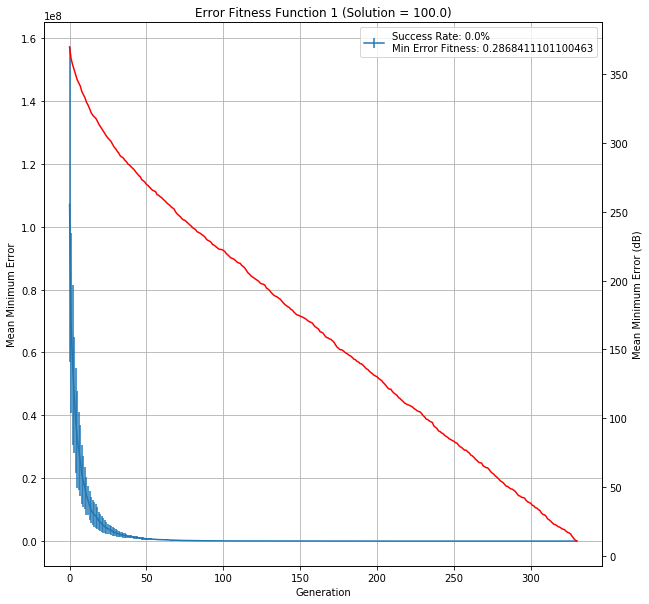

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_10_51_300_1.0_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,10,1.0,1.161622,2.037612,1.714089,2.733639,3.098151,2.142259,...,1.208447,1.12423,1.155555,1.770901,0.331429,2.949634,0.459937,1.700712,3:11:47,99900
